<h1><b>Stable Video Diffusion: A brief introduction to the paper and SVD source code</b></h1>
<h3>Stable Video Diffusion is licensed under the Stable Video Diffusion Research License, Copyright (c) Stability AI Ltd. All Rights Reserved.</h3>
<ul>
  <li><a href=https://github.com/Allen33669/stable_video_diffusion_project>source github</a></li>
  <li><a href=https://github.com/Allen33669/stable_video_diffusion_project/blob/main/LICENSE.txt>license</a></li>
  <li><a href=https://github.com/Allen33669/stable_video_diffusion_project/blob/main/Notice.txt>notice</a></li>
</ul>

<h1>References:</h1>
<ul>
<blockquote><h3>paper: </h3><a href=https://arxiv.org/abs/2311.15127>Stable Video Diffusion: Scaling Latent Video Diffusion Models to Large Datasets</a> </blockquote>
  <li><a href=https://github.com/Stability-AI/generative-models>github</a></li>
  <li><a href=https://github.com/Stability-AI/generative-models/blob/main/LICENSE-CODE>license</a></li>
  <li><a href=https://github.com/Stability-AI/generative-models/blob/main/model_licenses/LICENSE-SVD>model license</a></li>
  <li><a href=https://huggingface.co/stabilityai/stable-video-diffusion-img2vid/tree/main>hugging face</a></li>
  <li><a href=https://huggingface.co/stabilityai/stable-video-diffusion-img2vid/blob/main/LICENSE.md>hugging face license Powered by Stability AI</a></li>
</ul>
<br>
<ul>
<blockquote><h3>paper: </h3><a href=https://arxiv.org/abs/2206.00364>Elucidating the Design Space of Diffusion-Based Generative Models</a></blockquote>
</ul>




<h1><b>Please forgive any errors or omissions.</b></h1>
<h2>Introduction content:<h2>
<ul>
<blockquote><h3>framework</h3></blockquote>
<li>decouple the components of the framework</li>
<li>sampling method</li>
<li>continuous-time common Diffusion Model framework</li>
<li>find differentiation of x</li>
<li>neural network's target is score function</li>
</ul>
<ul>
<blockquote><h3>model architecture</h3></blockquote>
<li>transformer for video</li>
<li>residual block for video</li>
<li>decoder</li>
</ul>
<ul>
<blockquote><h3>conditions</h3></blockquote>
<li>embedding style</li>
<li>fuse style</li>
</ul>
<ul>
<blockquote><h3>sample process</h3></blockquote>
</ul>
<ul>
<blockquote><h3>"inference > sampling" section in google colab notebook compare the paper and SVD source code (Only partial results are shown)</h3></blockquote>
</ul>



<h2>framework:</h2>
<blockquote>
<h3>decouple the components of the framework:</h3>
<blockquote>source: Elucidating the Design Space of Diffusion-Based Generative Models, Page 3, Table 1</blockquote>
more degrees of freedom between the components of the framework like sampling method, neural network, parameters, and etc.<br>
</blockquote>
<br>
<blockquote>
<h3>sampling method:</h3>
<blockquote>source: Elucidating the Design Space of Diffusion-Based Generative Models, Page 7, algorithm 2</blockquote>
Heun's second order method<br>
stochastic sampler with σ(t) = t and s(t) = 1<br>
</blockquote>
<br>
<blockquote>
<h3>continuous-time common Diffusion Model framework:</h3>
<blockquote>source: Elucidating the Design Space of Diffusion-Based Generative Models, Page 5, formula (5)</blockquote>
It is both possible to use a discrete set or a continuous range of noise levels<br>
</blockquote>
<br>
<blockquote>
<h3>find differentiation of x:</h3>
<blockquote>source: Elucidating the Design Space of Diffusion-Based Generative Models, Page 6, formula (6)</blockquote>
a sum of the probability flow ODE and a time-varying Langevin diffusion SDE<br>
sigma schedule and scale factor can ba varied by time step<br>
</blockquote>
<br>
<blockquote>
<h3>neural network's target is score function:</h3>
<blockquote>source: Elucidating the Design Space of Diffusion-Based Generative Models, Page 3, formula (2) ~ (3)<br>
Stable Video Diffusion: Scaling Latent Video Diffusion Models to Large Datasets, page 18, formula (2)</blockquote>
Diffusion Model training reduces to learning a model for the score function<br>
The denoiser Dθ is trained via denoising score matching (DSM)<br>

<blockquote>source: Elucidating the Design Space of Diffusion-Based Generative Models, Page 8, formula (7)<br>
Stable Video Diffusion: Scaling Latent Video Diffusion Models to Large Datasets, page 18, formula (3)<br>
Stable Video Diffusion: Scaling Latent Video Diffusion Models to Large Datasets, page 19, formula (5) ~ (14)</blockquote>
Denoiser is not the same as neural network<br>
</blockquote>
<br>

<h2>model architecture:</h2>
changing the input shape to handle frames in transformer and residual block, the decoder also use the transformer and residual block for video

<blockquote>
<h3>transformer for video:</h3>
<blockquote>
reshape input from "(b t) s c" to "(b s) t c" to handle frames in the clip<br>
after do attention with conditions, focus on the frames and channel in each pixel<br>
restore the output from "(b s) t c" to "(b t) s c"<br>
b: batch, t: number of frames in a clip, s: height * weight, c: channel<br>
</blockquote>
</blockquote>
<br>
<blockquote>
<h3>residual block for video:</h3>
<blockquote>
reshape input from "(b t) c h w" to "b c t h w" to handle frames in the clip,
use conv3D to handle frames,  
restore the output from "b c t h w" to "(b t) c h w".
b: batch, t: number of frames in a clip, c: channel, h: height, w: weight
</blockquote>
</blockquote>
<br>
<blockquote>
<h3>decoder:</h3>
<blockquote>
use both transformer and residual block for video
</blockquote>
</blockquote>
<br>

<h2>conditions:</h2>
<blockquote>
<h3>embedding style:</h3>
<blockquote>
sinusoidal timestep embeddings: fps_id, motion_bucket_id, cond_aug, time step<br>
Openclip, arch="ViT-H-14": condition frames without noise<br>
legacy Encoder: condition frames with noise<br>
</blockquote>
</blockquote>
<br>
<blockquote>
<h3>fuse style:</h3>
<blockquote>
use attention by "Q = input x, K and V = conditions": other conditions like fps, motion bucket, condition frames, and etc.<br>
combine output x and sinusoidal timestep embeddings: time step<br>
</blockquote>
</blockquote>
<br>

<h2>sample process:</h2>
<blockquote>
set parameters<br>
instance model and filter<br>
preprocess<br>
set conditions<br>
Embedding conditions<br>
sampling<br>
decode the samples<br>
postprocess<br>
store the result<br>
</blockquote>

set environment > python

In [ ]:
!sudo update-alternatives --config python3
!sudo apt update
!sudo apt install python3-pip
!pip --version

There are 2 choices for the alternative python3 (providing /usr/bin/python3).

  Selection    Path                 Priority   Status
------------------------------------------------------------
* 0            /usr/bin/python3.11   2         auto mode
  1            /usr/bin/python3.10   1         manual mode
  2            /usr/bin/python3.11   2         manual mode

Press <enter> to keep the current choice[*], or type selection number: 1
update-alternatives: using /usr/bin/python3.10 to provide /usr/bin/python3 (python3) in manual mode
Hit:1 http://archive.ubuntu.com/ubuntu jammy InRelease
Get:2 http://security.ubuntu.com/ubuntu jammy-security InRelease [129 kB]
Get:3 http://archive.ubuntu.com/ubuntu jammy-updates InRelease [128 kB]
Get:4 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease [1,581 B]
Get:5 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease [3,632 B]
Get:6 https://r2u.stat.illinois.edu/ubuntu jammy InRelease [6,555 B]


download resource > source code

In [ ]:
!git clone https://github.com/Stability-AI/generative-models.git

Cloning into 'generative-models'...
remote: Enumerating objects: 1119, done.
remote: Counting objects: 100% (538/538), done.
remote: Compressing objects: 100% (160/160), done.
remote: Total 1119 (delta 408), reused 406 (delta 377), pack-reused 581 (from 1)
Receiving objects: 100% (1119/1119), 86.65 MiB | 47.37 MiB/s, done.
Resolving deltas: 100% (590/590), done.


download resource > upload resource

<ul>
  <li>/content/generative-models/scripts/sampling/simple_video_sample.py</li>
  <li>/content/generative-models/sgm/modules/diffusionmodules/denoiser.py</li>
  <li>/content/generative-models/sgm/modules/diffusionmodules/denoiser_scaling.py</li>
  <li>/content/generative-models/sgm/modules/diffusionmodules/sampling.py</li>
  <li>/content/generative-models/sgm/modules/diffusionmodules/video_model.py</li>
  <li>/content/generative-models/sgm/modules/encoders/modules.py</li>
  <li>/content/generative-models/sgm/modules/autoencoding/temporal_ae.py</li>
  <li>/content/generative-models/sgm/modules/video_attention.py</li>
  <li>/content/generative-models/assets/test2.jpg</li>
</ul>


set environment > install library

In [ ]:
!pip install -r /content/generative-models/requirements/pt2.txt
!pip install onnxruntime
!pip install numpy==1.24

  Cloning https://github.com/openai/CLIP.git to /tmp/pip-install-sf4zyrh6/clip_67cc82af25284a7fb6ba3d534799f53b
  Running command git clone --filter=blob:none --quiet https://github.com/openai/CLIP.git /tmp/pip-install-sf4zyrh6/clip_67cc82af25284a7fb6ba3d534799f53b
  Resolved https://github.com/openai/CLIP.git to commit dcba3cb2e2827b402d2701e7e1c7d9fed8a20ef1
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 7.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 199.1/199.1 KB 9.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.4/64.4 KB 7.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 266.3/266.3 KB 10.4 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 87.2/87.2 KB 11.0 MB/s eta 0:00:00
  Preparing me

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.0/16.0 MB 37.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.0/46.0 KB 6.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.8/86.8 KB 11.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.3/17.3 MB 73.3 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 2.1.3
    Uninstalling numpy-2.1.3:
      Successfully uninstalled numpy-2.1.3


set environment > import library

In [ ]:
import os
from IPython.display import Image, display, HTML
import imageio
import glob
import time
import torch

set environment > environment

In [ ]:
%matplotlib inline
os.environ.pop('MPLBACKEND', None)

'module://matplotlib_inline.backend_inline'

download resource > check point file

In [ ]:
check_point_folder = "/content/generative-models/checkpoints"
!mkdir {check_point_folder}
%cd {check_point_folder}

mkdir: cannot create directory ‘/content/generative-models/checkpoints’: File exists
/content/generative-models/checkpoints


In [ ]:
!wget https://huggingface.co/stabilityai/stable-video-diffusion-img2vid/resolve/main/svd.safetensors
!wget https://huggingface.co/stabilityai/stable-video-diffusion-img2vid/resolve/main/svd_image_decoder.safetensors
!ls {check_point_folder}

--2025-04-04 18:55:14--  https://huggingface.co/stabilityai/stable-video-diffusion-img2vid/resolve/main/svd.safetensors
Resolving huggingface.co (huggingface.co)... 3.168.73.38, 3.168.73.106, 3.168.73.129, ...
Connecting to huggingface.co (huggingface.co)|3.168.73.38|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://cdn-lfs-us-1.hf.co/repos/7e/f0/7ef086cede3588849d02a4ce93c0ab4ab9777d9771b33aaaa53ad7cb3eda786e/3e0994626df395a3831de024f11b2d9d241143bb6f16e2efbacced248aa18ce0?response-content-disposition=inline%3B+filename*%3DUTF-8%27%27svd.safetensors%3B+filename%3D%22svd.safetensors%22%3B&Expires=1743796514&Policy=eyJTdGF0ZW1lbnQiOlt7IkNvbmRpdGlvbiI6eyJEYXRlTGVzc1RoYW4iOnsiQVdTOkVwb2NoVGltZSI6MTc0Mzc5NjUxNH19LCJSZXNvdXJjZSI6Imh0dHBzOi8vY2RuLWxmcy11cy0xLmhmLmNvL3JlcG9zLzdlL2YwLzdlZjA4NmNlZGUzNTg4ODQ5ZDAyYTRjZTkzYzBhYjRhYjk3NzdkOTc3MWIzM2FhYWE1M2FkN2NiM2VkYTc4NmUvM2UwOTk0NjI2ZGYzOTVhMzgzMWRlMDI0ZjExYjJkOWQyNDExNDNiYjZmMTZlMmVmYmFjY2VkMjQ4YWExOGNlMD9yZ

inference > sampling

In [ ]:
project_folder = "/content/generative-models"
%cd {project_folder}

/content/generative-models


In [ ]:
torch.cuda.empty_cache()
torch.cuda.set_per_process_memory_fraction(0.5, device=0)

In [ ]:
!python /content/generative-models/scripts/sampling/simple_video_sample.py

Streaming output truncated to the last 5000 lines.

        [[[0.9994]]],


        [[[0.9994]]],


        [[[0.9994]]],


        [[[0.9994]]],


        [[[0.9994]]],


        [[[0.9994]]]], device='cuda:0')
c_out: tensor([[[[-0.0248]]],


        [[[-0.0248]]],


        [[[-0.0248]]],


        [[[-0.0248]]],


        [[[-0.0248]]],


        [[[-0.0248]]],


        [[[-0.0248]]],


        [[[-0.0248]]],


        [[[-0.0248]]],


        [[[-0.0248]]],


        [[[-0.0248]]],


        [[[-0.0248]]],


        [[[-0.0248]]],


        [[[-0.0248]]],


        [[[-0.0248]]],


        [[[-0.0248]]],


        [[[-0.0248]]],


        [[[-0.0248]]],


        [[[-0.0248]]],


        [[[-0.0248]]],


        [[[-0.0248]]],


        [[[-0.0248]]],


        [[[-0.0248]]],


        [[[-0.0248]]],


        [[[-0.0248]]],


        [[[-0.0248]]],


        [[[-0.0248]]],


        [[[-0.0248]]]], device='cuda:0')
c_in: tensor([[[[0.9997]]],


        [[[0.9997]]],


        [[[

inference > display result

In [ ]:
from IPython.display import Image, display, HTML
import glob

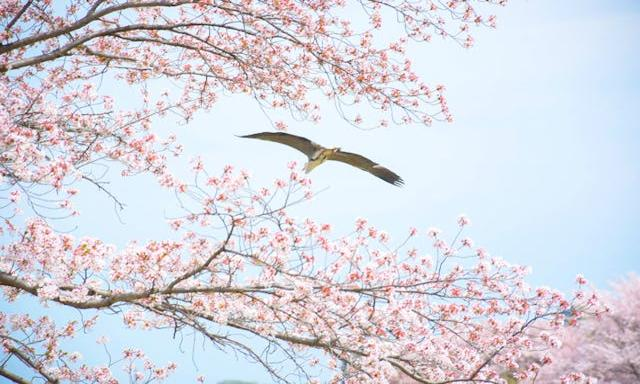

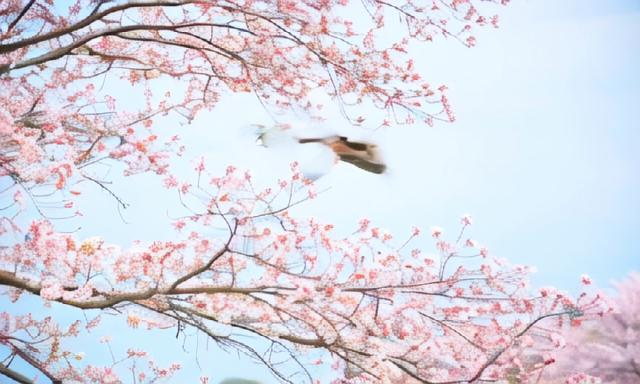

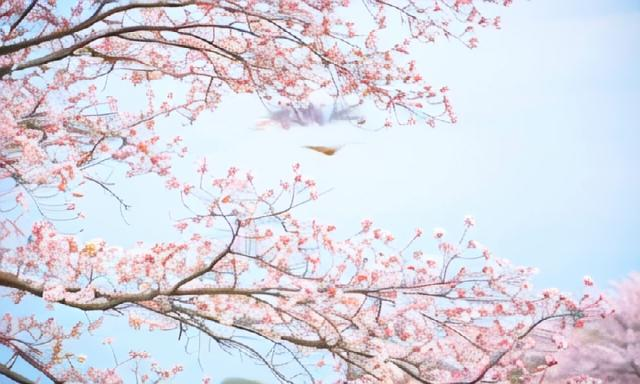

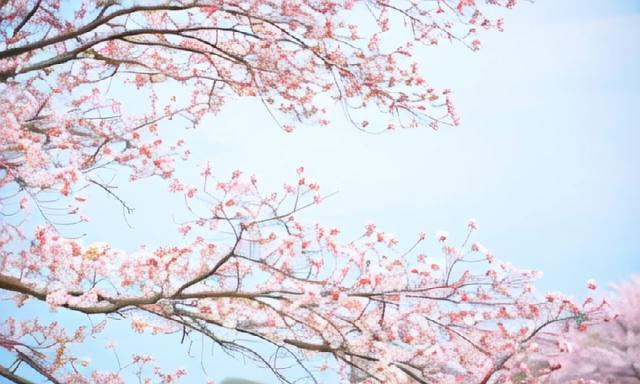

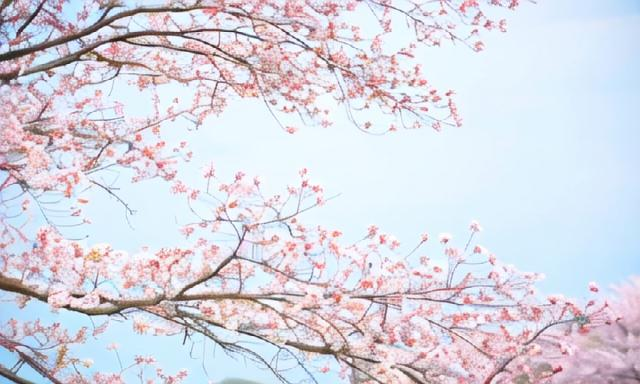

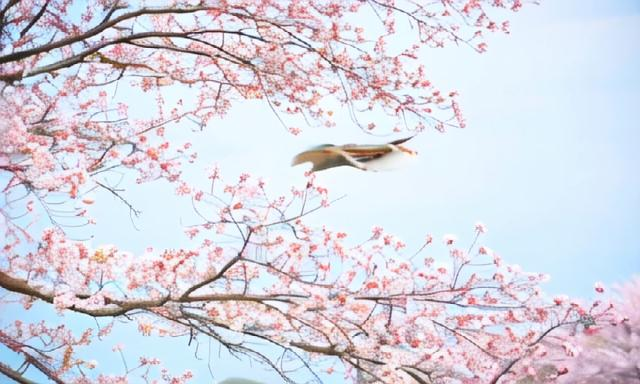

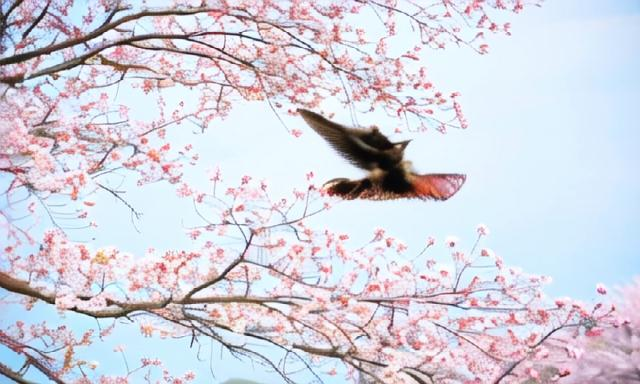

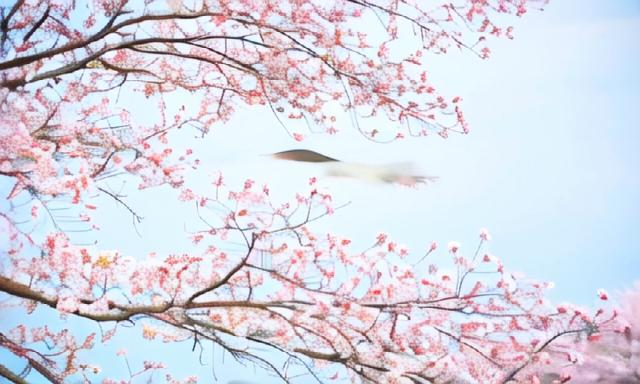

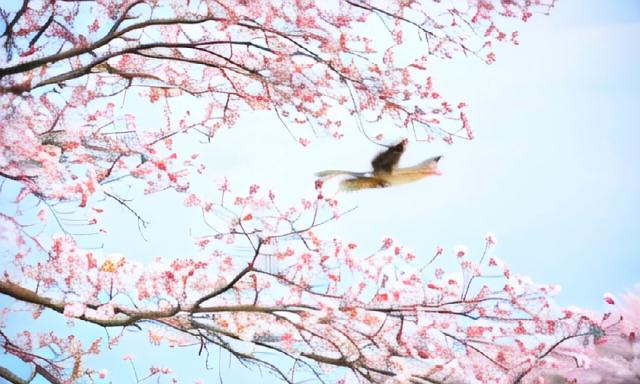

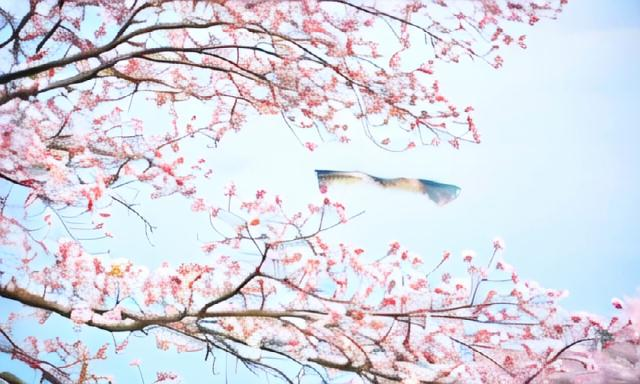

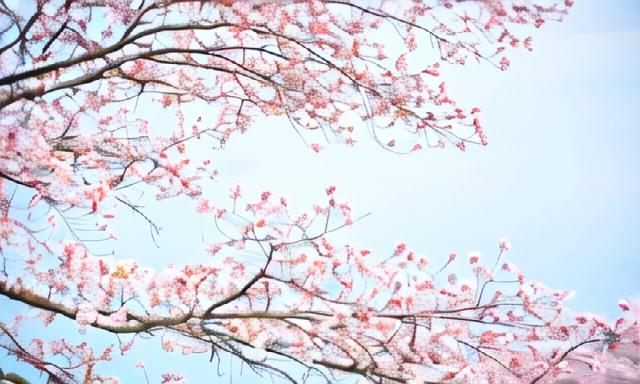

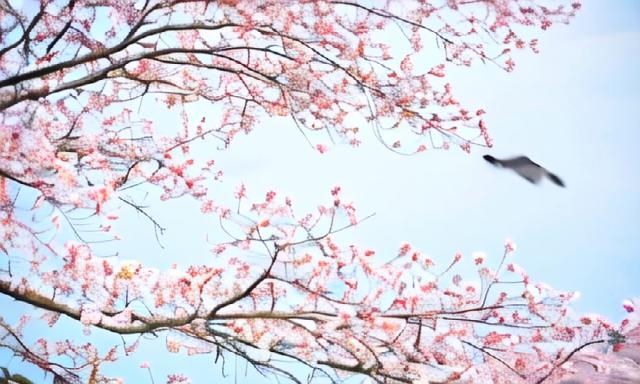

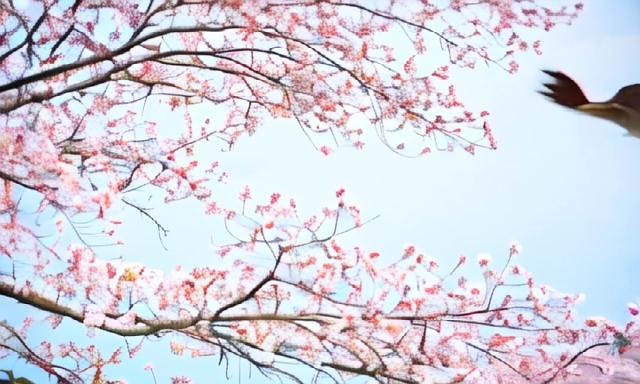

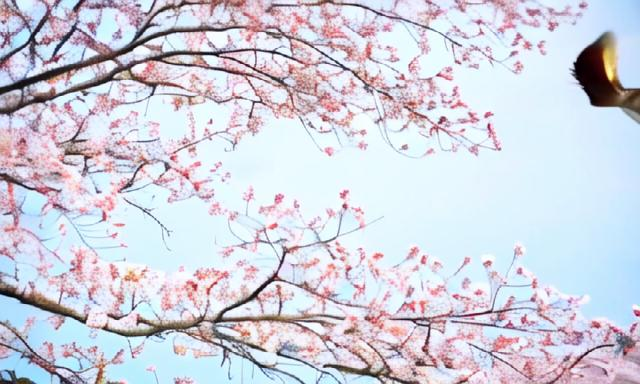

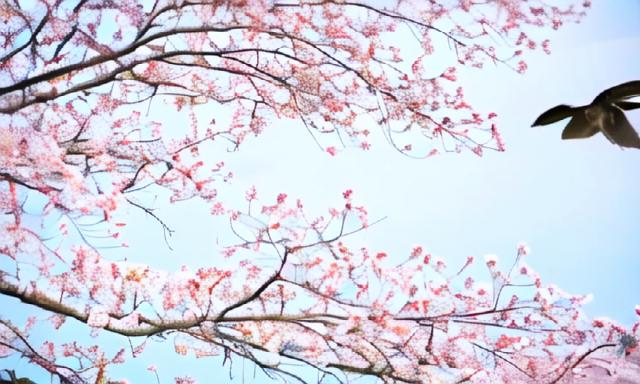

In [ ]:
display(Image(filename='/content/generative-models/outputs/simple_video_sample/svd/000000.jpg'))
for i in range(0, 14):
  if i < 10:
    image_file_path = "/content/generative-models/outputs/simple_video_sample/svd/000000_" + "0" + str(i) +".jpg"
  else:
    image_file_path = "/content/generative-models/outputs/simple_video_sample/svd/000000_" + str(i) +".jpg"
  display(Image(filename=image_file_path))

In [ ]:
image_folder = "/content/generative-models/outputs/simple_video_sample/svd"
images = sorted(glob.glob(f"{image_folder}/*.jpg"))

output_gif = "/content/generative-models/outputs/simple_video_sample/svd/test.gif"
frames = [imageio.imread(image) for image in images]
imageio.mimsave(output_gif, frames, duration=0.1)  # Duration between frames (s)

<ipython-input-49-007d1c307e8c>:5: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  frames = [imageio.imread(image) for image in images]


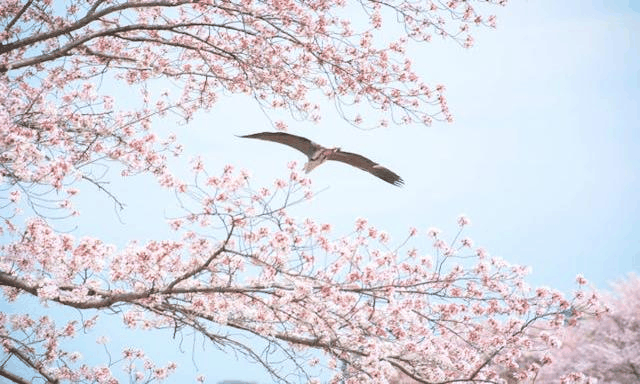

In [ ]:
display(Image(filename=output_gif))